In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import zipf
from scipy import special 

In [2]:
#CB91_blue = '#2CBDEF'
#CB91_green = '#47DBCD'
#CB91_pink = '#F3A0F2'
#CB91_purple = '#9D2EC5'
#CB91_violet = '#661D98'
#CB91_amber = '#F5B14C'

fl_L40 = 'brown'
fl_L60 = 'darkmagenta'
fl_L80 = 'gray'
fl_L100 = 'olive'
fl_L120 = 'teal'
fl_L200 = 'darkorange'



In [3]:
dir = "./acc/"
fl_files = ["FL_MLP2_non_iid_B10_L40_G500000.weight.pth.acc.csv",
            "FL_MLP2_non_iid_B10_L60_G500000.weight.pth.acc.csv",
            "FL_MLP2_non_iid_B10_L80_G500000.weight.pth.acc.csv",
            "FL_MLP2_non_iid_B10_L100_G500000.weight.pth.acc.csv",
            "FL_MLP2_non_iid_B10_L120_G500000.weight.pth.acc.csv",
            "FL_MLP2_non_iid_B10_L200_G500000.weight.pth.acc.csv"]

efl_files = ["eFL_MLP2_non_iid_B10_L41_E2_G500000_1z_rnd.part5.weight.pth.acc.csv",
             "eFL_MLP2_non_iid_B10_L61_E3_G500000_1z_rnd.part5.weight.pth.acc.csv",
             
             "eFL_MLP2_non_iid_B10_L81_E4_G500000_1z_rnd.part5.weight.pth.acc.csv",
             "eFL_MLP2_non_iid_B10_L82_E2_G500000_1z_rnd.part5.weight.pth.acc.csv",
             
             "eFL_MLP2_non_iid_B10_L101_E5_G500000_1z_rnd.part5.weight.pth.acc.csv",
             "eFL_MLP2_non_iid_B10_L102_E2_G500000_1z_rnd.part5.weight.pth.acc.csv",
             
             "eFL_MLP2_non_iid_B10_L121_E6_G500000_1z_rnd.part5.weight.pth.acc.csv",
             "eFL_MLP2_non_iid_B10_L122_E3_G500000_1z_rnd.part5.weight.pth.acc.csv",
             "eFL_MLP2_non_iid_B10_L123_E2_G500000_1z_rnd.part5.weight.pth.acc.csv",
             
             "eFL_MLP2_non_iid_B10_L201_E10_G500000_1z_rnd.part5.weight.pth.acc.csv",
             "eFL_MLP2_non_iid_B10_L202_E5_G500000_1z_rnd.part5.weight.pth.acc.csv",
             "eFL_MLP2_non_iid_B10_L203_E3_G500000_1z_rnd.part5.weight.pth.acc.csv",
             "eFL_MLP2_non_iid_B10_L204_E2_G500000_1z_rnd.part5.weight.pth.acc.csv",
             "eFL_MLP2_non_iid_B10_L205_E2_G500000_1z_rnd.part5.weight.pth.acc.csv"]


In [4]:
fl_dfs = []
efl_dfs = []

for i in range(len(fl_files)):
    fl_dfs.append(pd.read_csv(dir + fl_files[i]))
    
for i in range(len(efl_files)):
    efl_dfs.append(pd.read_csv(dir + efl_files[i]))


In [20]:
fl_colors = [fl_L40, fl_L60, fl_L80, fl_L100, fl_L120, fl_L200]
efl_colors = [fl_L40, fl_L60, fl_L80, fl_L80, fl_L100, fl_L100, fl_L120, fl_L120, fl_L120, 
              fl_L200, fl_L200, fl_L200, fl_L200, fl_L200]
efl_line_styles = ["--","--","--","-.","--","-.","--","-.", "dotted", "--","-.", "dotted", "(offset, on-off-dash-seq)--", "(offset, on-off-dash-seq)-." ]
efl_markers = ["8", "8", "8", "*", "8", "*", "8", "*", "d", "8", "*", "d",">", "^"]
fl_x_scales = [40, 60, 80, 100, 120, 200]
efl_x_scales = [41 * 2, 61*3, 81*4, 82 * 2, 101 * 5, 102 * 2, 121*6, 122*3, 123*2, 201 * 10, 202*5, 203*3, 204*2, 205*2]


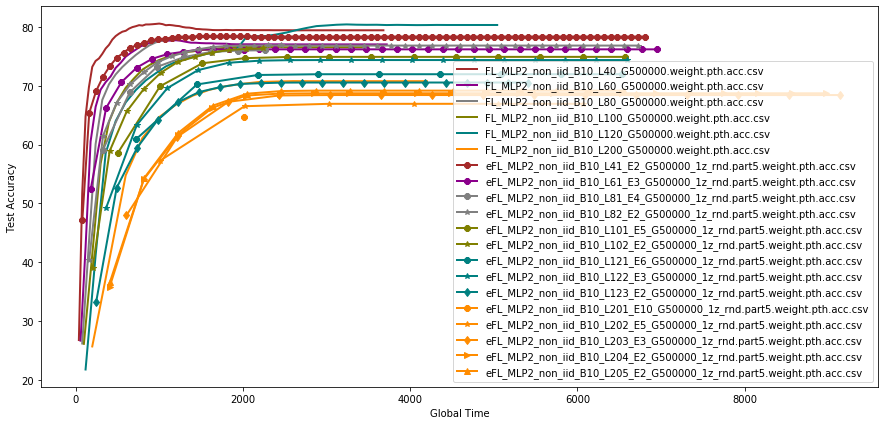

In [21]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)

for i in range(len(fl_dfs)):
    plt.plot(fl_x_scales[i]*np.arange(1, fl_dfs[i].shape[0] + 1), fl_dfs[i]['test_acc'], ls ="-", color = fl_colors[i], linewidth = 2, label = fl_files[i])

for i in range(len(efl_dfs)):
    plt.plot(efl_x_scales[i]*np.arange(1, efl_dfs[i].shape[0] + 1), efl_dfs[i]['test_acc'], marker = efl_markers[i], color = efl_colors[i], linewidth = 2, label = efl_files[i])

ax.set_xlabel('Global Time')
ax.set_ylabel('Test Accuracy')
ax.legend(loc='best')
plt.show()

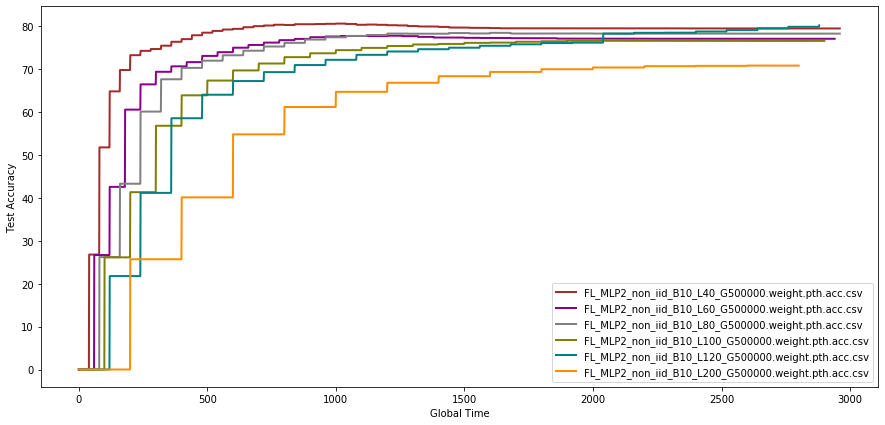

array([ 0.  ,  0.  ,  0.  , ..., 70.79, 70.79, 70.78])

In [22]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)

x_lim = 3000


for i in range(len(fl_dfs)):
    x = fl_x_scales[i]*np.arange(1, fl_dfs[i].shape[0] + 1)
    x = x[x<x_lim]
    
    y = np.zeros(x[len(x) - 1] + 1)
    y[x] = fl_dfs[i]['test_acc'][0:len(x)]
    
    for j in range (1, len(y)):
        if y[j] == 0:
            y[j] = y[j-1]
    
    plt.plot(np.arange(len(y)), y, ls ="-", color = fl_colors[i], linewidth = 2, label = fl_files[i])

    #plt.plot(x, fl_dfs[i]['test_acc'][0:len(x)], ls ="-", color = fl_colors[i], linewidth = 2, label = fl_files[i])


ax.set_xlabel('Global Time')
ax.set_ylabel('Test Accuracy')
ax.legend(loc='best')
plt.show()
y

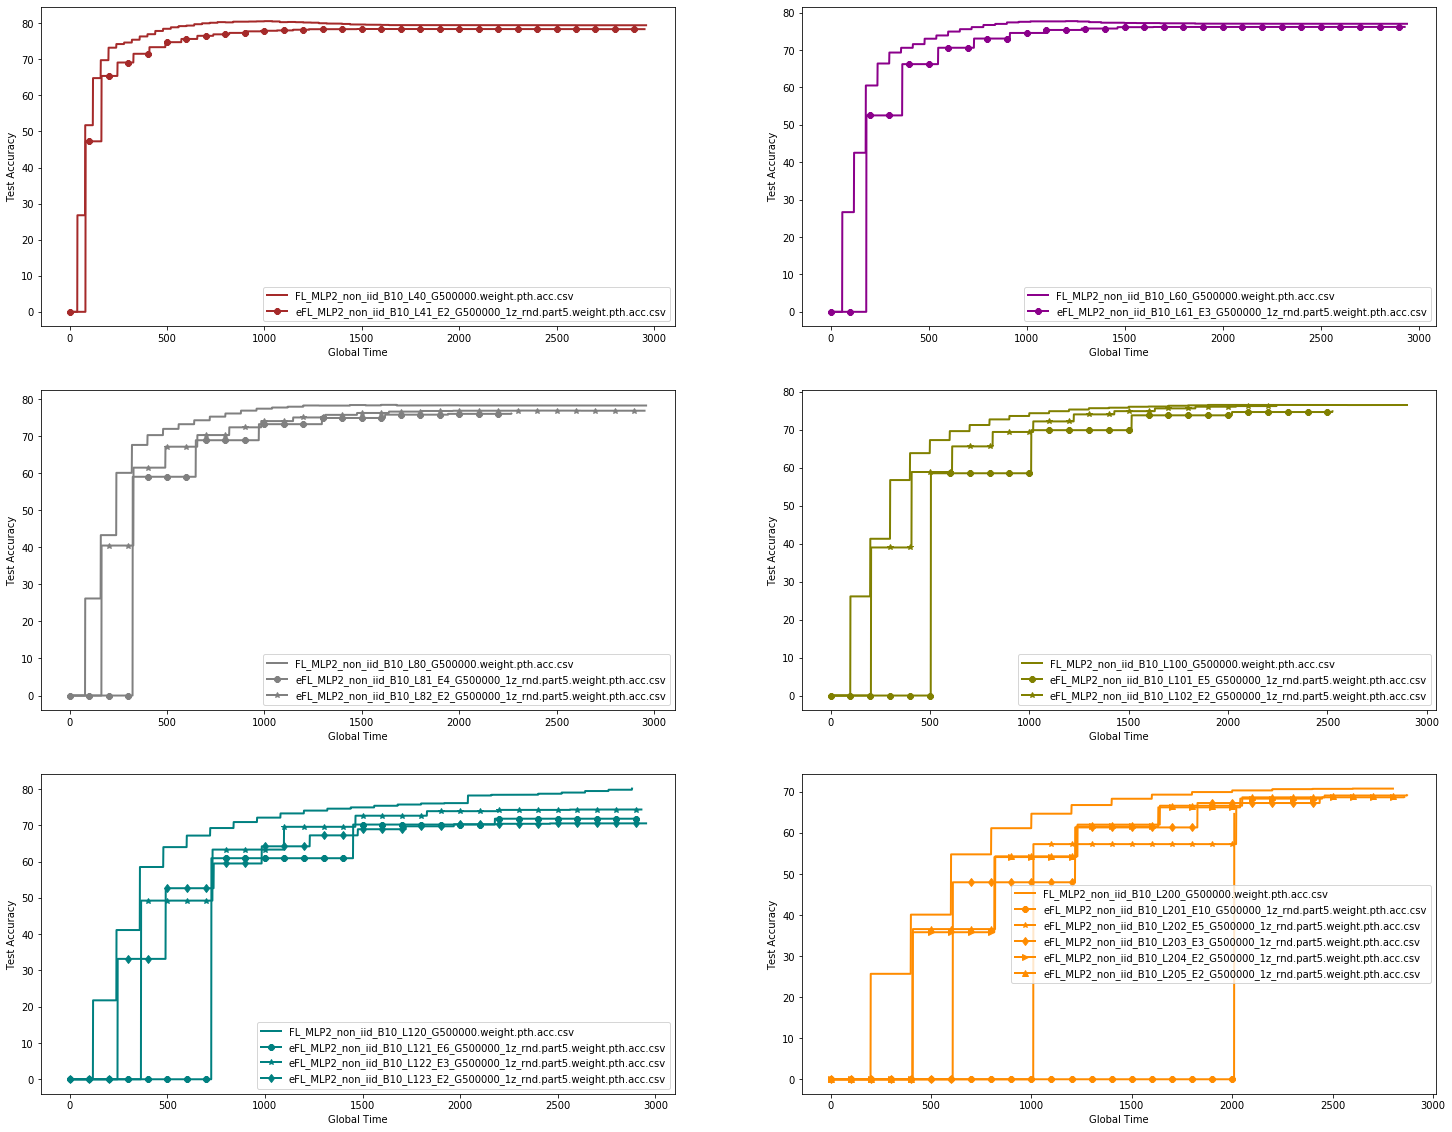

In [32]:
fig, axs = plt.subplots(3, 2, figsize=(25,20))

#fig = plt.figure(figsize=(20,5))
#ax = fig.add_subplot(111)
x_lim = 3000
num_fl_lines = 1
efl_index = 0

for i in range(3):
    for j in range(2):
        fl_x = fl_x_scales[i *2+j]*np.arange(1, fl_dfs[i*2+j].shape[0] + 1)
        fl_x = fl_x[fl_x < x_lim]
        
        fl_y = np.zeros(fl_x[len(fl_x) - 1] + 1)
        fl_y[fl_x] = fl_dfs[i * 2 + j]['test_acc'][0:len(fl_x)]
    
        for u in np.arange (1, len(fl_y)):
            if fl_y[u] == 0:
                fl_y[u] = fl_y[u-1]
    
    
        #axs[i,j].plot(fl_x, fl_dfs[i * 2 + j]['test_acc'][0:len(fl_x)], ls ="-", color = fl_colors[i*2+j], linewidth = 2, label = fl_files[i*2+j])
        #axs[i,j].plot(efl_x, efl_dfs[i * 2 + j]['test_acc'][0:len(efl_x)], ls =efl_line_styles[i*2+j], color = efl_colors[i*2+j], linewidth = 2, label = efl_files[i*2+j])
        
        axs[i,j].plot(np.arange(len(fl_y)), fl_y, ls ="-", color = fl_colors[i*2+j], linewidth = 2, label = fl_files[i*2+j])
        
        if ((i * 2 + j) == 2) or ((i * 2 + j) == 3):
            num_fl_lines = 2
        elif (i * 2 + j) == 4:
            num_fl_lines = 3
        elif (i * 2 + j) == 5:
            num_fl_lines = 5
        
        for t in range(num_fl_lines):
            efl_x = efl_x_scales[efl_index + t]*np.arange(1, efl_dfs[efl_index + t].shape[0] + 1)
            efl_x = efl_x[efl_x<x_lim]
        
            efl_y = np.zeros(efl_x[len(efl_x) - 1] + 1)
            efl_y[efl_x] = efl_dfs[efl_index + t]['test_acc'][0:len(efl_x)]
    
            for u in np.arange (1, len(efl_y)):
                if efl_y[u] == 0:
                    efl_y[u] = efl_y[u-1]


            axs[i,j].plot(np.arange(len(efl_y)), efl_y, markevery = 100, marker =efl_markers[efl_index + t], color = efl_colors[efl_index +t], linewidth = 2, label = efl_files[efl_index +t])
        
        efl_index += num_fl_lines
            
        axs[i,j].legend(loc='best')
        axs[i,j].set_xlabel('Global Time')
        axs[i,j].set_ylabel('Test Accuracy')
        

        
plt.show()

In [10]:
fig, axs = plt.subplots(3, 2, figsize=(25,20))

#fig = plt.figure(figsize=(20,5))
#ax = fig.add_subplot(111)
x_lim = 3000
for i in range(2):
    for j in range(2):
        fl_x = fl_x_scales[i *2+j]*np.arange(fl_dfs[i*2+j].shape[0])
        fl_x = fl_x[fl_x < x_lim]
        efl_x = efl_x_scales[i *2+j]*np.arange(efl_dfs[i*2+j].shape[0])
        efl_x = efl_x[efl_x<x_lim]
        
        axs[i,j].plot(fl_x, fl_dfs[i * 2 + j]['test_acc'][0:len(fl_x)], ls ="-", color = fl_colors[i*2+j], linewidth = 2, label = fl_files[i*2+j])
        axs[i,j].plot(efl_x, efl_dfs[i * 2 + j]['test_acc'][0:len(efl_x)], ls =efl_line_styles[i*2+j], color = efl_colors[i*2+j], linewidth = 2, label = efl_files[i*2+j])
        axs[i,j].legend(loc='best')
        axs[i,j].set_xlabel('Global Time')
        axs[i,j].set_ylabel('Test Accuracy')
        
i, j = 2, 0        
fl_x = fl_x_scales[i *2+j]*np.arange(fl_dfs[i*2+j].shape[0])
fl_x = fl_x[fl_x < x_lim]
efl_x = efl_x_scales[i *2+j]*np.arange(efl_dfs[i*2+j].shape[0])
efl_x = efl_x[efl_x<x_lim]

axs[i,j].plot(fl_x, fl_dfs[i * 2 + j]['test_acc'][0:len(fl_x)], ls ="-", color = fl_colors[i*2+j], linewidth = 2, label = fl_files[i*2+j])
axs[i,j].plot(efl_x, efl_dfs[i * 2 + j]['test_acc'][0:len(efl_x)], ls =efl_line_styles[i*2+j], color = efl_colors[i*2+j], linewidth = 2, label = efl_files[i*2+j])

efl_x = efl_x_scales[5]*np.arange(efl_dfs[5].shape[0])
efl_x = efl_x[efl_x<x_lim]
axs[i,j].plot(efl_x, efl_dfs[5]['test_acc'][0:len(efl_x)], ls =efl_line_styles[5], color = efl_colors[5], linewidth = 2, label = efl_files[5])

efl_x = efl_x_scales[6]*np.arange(efl_dfs[6].shape[0])
efl_x = efl_x[efl_x<x_lim]
axs[i,j].plot(efl_x, efl_dfs[6]['test_acc'][0:len(efl_x)], ls =efl_line_styles[6], color = efl_colors[6], linewidth = 2, label = efl_files[6])

axs[i,j].legend(loc='best')
axs[i,j].set_xlabel('Global Time')
axs[i,j].set_ylabel('Test Accuracy')


i, j = 2, 1        
fl_x = fl_x_scales[i *2+j]*np.arange(fl_dfs[i*2+j].shape[0])
fl_x = fl_x[fl_x < x_lim]
efl_x = efl_x_scales[7]*np.arange(efl_dfs[7].shape[0])
efl_x = efl_x[efl_x<x_lim]

axs[i,j].plot(fl_x, fl_dfs[i * 2 + j]['test_acc'][0:len(fl_x)], ls ="-", color = fl_colors[i*2+j], linewidth = 2, label = fl_files[i*2+j])
axs[i,j].plot(efl_x, efl_dfs[7]['test_acc'][0:len(efl_x)], ls =efl_line_styles[7], color = efl_colors[7], linewidth = 2, label = efl_files[7])

efl_x = efl_x_scales[8]*np.arange(efl_dfs[8].shape[0])
efl_x = efl_x[efl_x<x_lim]
axs[i,j].plot(efl_x, efl_dfs[8]['test_acc'][0:len(efl_x)], ls =efl_line_styles[8], color = efl_colors[8], linewidth = 2, label = efl_files[8])

axs[i,j].legend(loc='best')
axs[i,j].set_xlabel('Global Time')
axs[i,j].set_ylabel('Test Accuracy')


        
plt.show()

array([   0,  200,  400,  600,  800, 1000, 1200, 1400, 1600, 1800, 2000,
       2200, 2400, 2600, 2800])

In [ ]:
flY